## Investigate a Movie Dataset
### Dataset Description 
The TMDb movie original dataset contains the information of about 10,000 films from TMDb including key details like user ratings, revenue and different movie details. The dataset is designed to provied information about various aspects of the movie industy, including budget, cast and genres. The dataset consists of several columns:
- **id**: An identifier for the film
- **title**: The title of the film
- **genres**: genres for each film seperated by a pipe
- **cast**: A list of actors/actresses in the film seperated by a pipe
- **release_date**: The date the movie was released
- **budget**: The budget of the film
- **revenue**: The total revenue generated by each film
- **runtime**: The lenghth of the film
- **vote_average**: The average rating for the film
- **vote_count**: The total number of ratings for the film

### Question(s) for Analysis
- Which genres have the best and worst popularity on average?
- What is the distribution of movie budgets in this dataset?

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Data Wrangling

In [2]:
#load data
df = pd.read_csv('/kaggle/input/tmdb-movies-csv/tmdb-movies (1).csv')
df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [3]:
#find data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
#find which columns have null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
#find shape
df.shape

(10866, 21)

In [6]:
#find duplicated rows
df[df.duplicated]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
#check if duplicates in id column
df[df.duplicated(['id'], keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
#check if duplicates in imdb_id column
df[df.duplicated(['imdb_id'], keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000e+00,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000e+00,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000e+00,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000e+00,0.0
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,967000.0
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,967000.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000e+00,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000e+00,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000e+00,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,4.680167e+02,0.0


### Data Cleaning

In [9]:
#drop duplicated row
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

In [10]:
#show column titles
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [11]:
#drop unecessary columns that are not needed for the analysis/recognition of the data
df.drop(['cast', 'homepage', 'director', 'tagline', 'overview', 'runtime', 'production_companies', 'vote_count', 'keywords', 'vote_average'], axis=1, inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,genres,release_date,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09


In [12]:
#change popularity to int to improve readability
df['popularity'] = df['popularity'].astype(int)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,genres,release_date,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09


In [13]:
#show data types
df.dtypes

id                  int64
imdb_id            object
popularity          int64
budget              int64
revenue             int64
original_title     object
genres             object
release_date       object
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [14]:
#convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

/tmp/ipykernel_17/3643704720.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


id                         int64
imdb_id                   object
popularity                 int64
budget                     int64
revenue                    int64
original_title            object
genres                    object
release_date      datetime64[ns]
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [15]:
#split genres column with function
def split_and_explode(df, column_name):    
    
    # split the genres column by '|'    
    df['genres'] = df['genres'].str.split('|')    
    
    # explode the df    
    df = df.explode('genres')    
    
    return df

# add funtion to df
df = split_and_explode(df, 'genres')
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,genres,release_date,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,Action,2015-06-09,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,Adventure,2015-06-09,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,Science Fiction,2015-06-09,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,Thriller,2015-06-09,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,Action,2015-05-13,2015,1.379999e+08,3.481613e+08
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,Adventure,2015-05-13,2015,1.379999e+08,3.481613e+08
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,Science Fiction,2015-05-13,2015,1.379999e+08,3.481613e+08
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,Thriller,2015-05-13,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13,110000000,295238201,Insurgent,Adventure,2015-03-18,2015,1.012000e+08,2.716190e+08
2,262500,tt2908446,13,110000000,295238201,Insurgent,Science Fiction,2015-03-18,2015,1.012000e+08,2.716190e+08


In [16]:
#drop rows with missing or null values
df = df.dropna(subset=['budget', 'revenue', 'genres'])
df.shape

(26955, 11)

## Exploratory Data Analysis

### 1. Which genres have the best and worst popularity on average?

In [17]:
#calculate average
rp = df.groupby('genres').agg(    
    average_popularity=('popularity', 'mean'))

#sort genres
rp = rp.sort_values(by=['average_popularity', 'genres'], ascending=False)
rp.head(5)

,average_popularity
genres,
Adventure,0.732835
Science Fiction,0.607811
Fantasy,0.586245
Action,0.519715
Animation,0.432046


In [18]:
#convert average popularity to percentage
rp['average_popularity'] = (rp['average_popularity'] * 100).astype(int)
rp.head()

,average_popularity
genres,
Adventure,73
Science Fiction,60
Fantasy,58
Action,51
Animation,43


In [19]:
rp

,average_popularity
genres,
Adventure,73
Science Fiction,60
Fantasy,58
Action,51
Animation,43
Family,38
War,34
Thriller,33
Crime,32


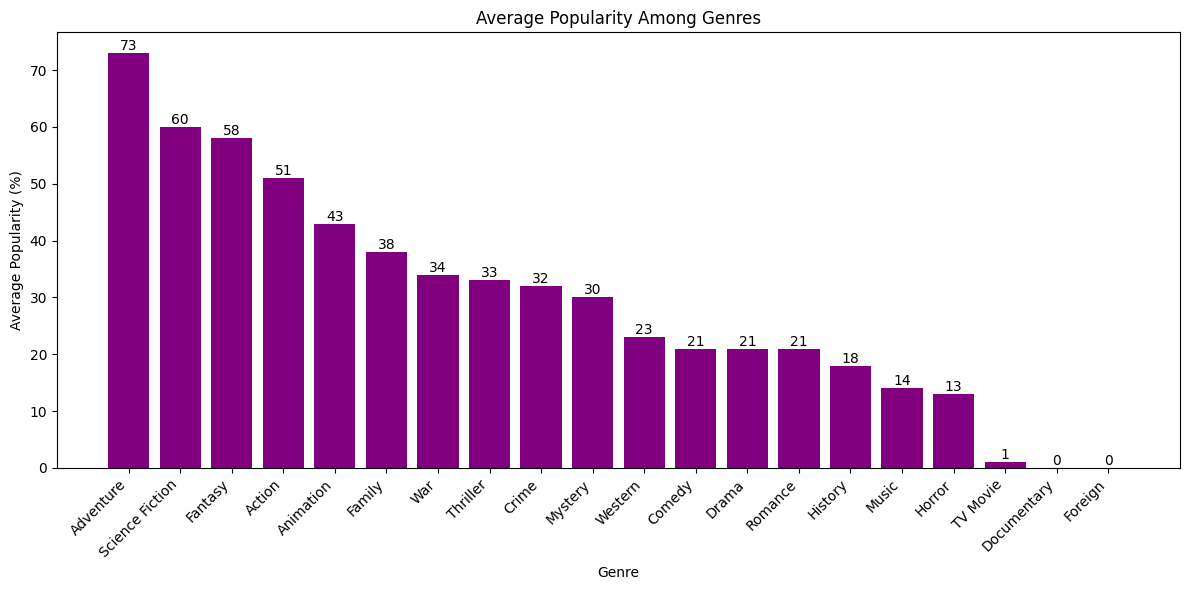

In [20]:
#make figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

#plot bar chart
bars = ax.bar(rp.index, rp['average_popularity'], color='purple')

#rotate labels to make them readable
plt.xticks(rotation=45, ha='right')

#set labels and title
ax.set_xlabel("Genre")
ax.set_ylabel("Average Popularity (%)")
ax.set_title("Average Popularity Among Genres")

#plot value labels
for bar in bars:    
    yval = bar.get_height()    
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')    
    
#adjust layout and display
plt.tight_layout()
plt.show()

### 2. What is the distribution of movie budgets in this dataset?

In [21]:
#drop rows where budget is zero
df = df[df['budget'] != 0]
df.shape

(13601, 11)

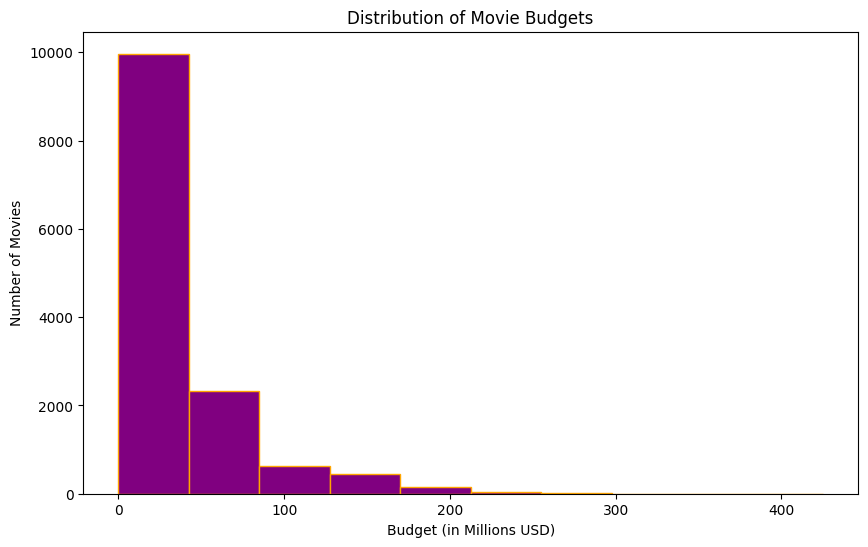

In [22]:
#plot figure
plt.figure(figsize=(10, 6))

#convert budget to millions
df['budget_millions'] = df['budget'] / 1_000_000

#create hist
plt.hist(df['budget_millions'], bins=10, color='purple', edgecolor='orange')

#add title and label
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget (in Millions USD)')
plt.ylabel('Number of Movies')

#display
plt.show()

## Conclusions
### Which genres have the best and worst popularity on average??
Adventure is the most popular on average with 73% popularity. TV movies, documentaries and foreign films have the lowest popularity with 0 to 1 percent popularity. 

#### Limitation to this analysis
A limitation with this analysis is that it doesn't take into account the variability of different factors. Popularity of different movies can differ based on factors including when it was released (time of year), marketing, cast or director. By taking these averages at face value we overlook the nuances and outliers that might occur due to this. 

There also is not a justification in this dataset that takes into account the number of movies within each genre. This can skew the results because one genre may be utilizing 500 movies and another may only be utilizing 150 depending on how many of each were in the given dataset. Additional analysis can be done by getting a set sample number for each genre and comparing the average popularity. 
> 
> 
> 

### What is the distribution of movie budgets in this dataset?
The histogram that displays the distribution of movie budgets is right skewed, meaning that majority of the movies in this dataset have a lower budget.There is a sampling bias. There were rows with the budget column not filled in or at 0 and those rows were dropped to not skew the analysis. Those values could have strongly affected the analysis if filled in properly. 

Additional research could be done in obtaining the missing values for more accurate results. Also, an analysis can be done using a box plot to understand the ranges of budgets in this table.